In [1]:
# Import external script
%run models.py

In [2]:
# Import data from CSV
fdata = pd.read_csv('data_histories.csv', index_col="dp_folio")
fdata.head()

,id_sexo,Aedad,AAedad,Apuesto,id_gestud,AIMC,fuma,fuma_act,ejer_act,ejer1,...,locout5,locout10,locout20,locout30,rest_act,rest1,rest5,rest10,rest20,rest30
dp_folio,,,,,,,,,,,,,,,,,,,,,
1,F,51,6,Admin,CarTec,4,1,3,0,2,...,1,1,1,1,0,0,0,0,0,0
2,F,38,4,Sec,Bach,3,2,-1,0,0,...,0,0,0,0,1,3,0,0,0,0
3,F,34,3,Int,Sec,5,1,1,0,0,...,1,-1,-1,-1,0,0,0,-1,-1,-1
4,M,63,8,Jef,CarTec,4,2,-1,2,2,...,0,0,0,-1,0,0,0,0,0,0
5,M,42,4,EM,Sec,3,1,2,2,2,...,0,0,0,0,0,0,0,0,0,0


In [3]:
pm = ProbModel()

In [4]:
# Clusterize between obese and non obese
obesity = {0:[1,2,3], 1:[4,5,6]}
ndata = pm.clusterize_discrete("AIMC", obesity, "obesity", fdata)

# Clusterize excercise features
ejer = {"A":"greatereq_than(2.5)", "B":"less_than(2.5)"}
ndata = pm.clusterize_continuous("ejer_act", ejer, "ejer0B", ndata)
ndata = pm.clusterize_continuous("ejer1", ejer, "ejer1B", ndata)
ndata = pm.clusterize_continuous("ejer5", ejer, "ejer5B", ndata)
ndata = pm.clusterize_continuous("ejer10", ejer, "ejer10B", ndata)
ndata = pm.clusterize_continuous("ejer20", ejer, "ejer20B", ndata)
ndata = pm.clusterize_continuous("ejer30", ejer, "ejer30B", ndata)

# Clusterize weight features
condi = {"A":[4,5], "B":[1,2,3]}
ndata = pm.clusterize_discrete("condi_act", condi, "condi0B", ndata)
ndata = pm.clusterize_discrete("condi1", condi, "condi1B", ndata)
ndata = pm.clusterize_discrete("condi5", condi, "condi5B", ndata)
ndata = pm.clusterize_discrete("condi10", condi, "condi10B", ndata)
ndata = pm.clusterize_discrete("condi20", condi, "condi20B", ndata)
ndata = pm.clusterize_discrete("condi30", condi, "condi30B", ndata)

ndata = pm.group_list_of_variables(["ejer0B", "ejer1B", "ejer5B", "ejer10B"], "ejerHistory", ndata)
ndata = pm.group_list_of_variables(["condi0B", "condi1B", "condi5B", "condi10B", "condi20B", "condi30B"], "condiHistory", ndata)

In [5]:
selected_features = ["ejer0B", "ejer1B", "ejer5B", "ejer10B", "ejerHistory", "obesity"]
query_features = ["ejer0B", "ejer1B", "ejer5B", "ejer10B"]
sdata = ndata[selected_features]
sdata.head()

,ejer0B,ejer1B,ejer5B,ejer10B,ejerHistory,obesity
dp_folio,,,,,,
1,B,B,B,B,BBBB,1
2,B,B,A,A,BBAA,0
3,B,B,B,A,BBBA,1
4,B,B,A,A,BBAA,1
5,B,B,B,B,BBBB,0


In [6]:
rdata = sdata[(ndata.ejer20B != "N") & (ndata.ejer10B != "N") & (ndata.ejer5B != "N") & (ndata.ejer1B != "N") & (ndata.ejer0B != "N")]
rdata.shape

(939, 6)

In [7]:
validation = Validation(NB())

### Features to be queried

In [8]:
queries_nba = {"ejer0B": ["A", "B"],
               "ejer1B": ["A", "B"],
               "ejer5B": ["A", "B"],
               "ejer10B": ["A", "B"],
              }

In [27]:
#validation.run_cv(rdata, queries, "obesity", 1, 2, "Test plot")

In [28]:
#validation.model.get_predicted_labels()

In [9]:
buf = np.array(pm.string_generator("", ["A", "B"], 4)).flatten()
hist_posibilities = pm.string_padding("", buf, "")
hist_posibilities[4]

'ABAA'

In [10]:
queries_gnb = {"ejerHistory": hist_posibilities}

### Threshold data - NBA

In [11]:
nba = NB()

In [12]:
nba.train(queries_nba, "obesity", 1, rdata)

In [13]:
nba.predict(rdata)

In [14]:
tdata_nba = nba.predicted_scores.join(nba.get_predicted_labels()).join(rdata["obesity"]).join(rdata["ejerHistory"], rsuffix='_original')

In [15]:
tdata_nba

,ejer0B,ejer1B,ejer5B,ejer10B,total_score,predicted_obesity,obesity,ejerHistory
dp_folio,,,,,,,,
1,0.29819,0.295867,0.190501,0.0250361,0.809594,1.0,1,BBBB
2,0.29819,0.295867,-0.180694,-0.00385293,0.409511,1.0,0,BBAA
4,0.29819,0.295867,-0.180694,-0.00385293,0.409511,1.0,1,BBAA
5,0.29819,0.295867,0.190501,0.0250361,0.809594,1.0,0,BBBB
6,-0.582169,0.295867,0.190501,0.0250361,-0.070765,0.0,0,ABBB
...,...,...,...,...,...,...,...,...
1076,0.29819,0.295867,0.190501,-0.00385293,0.780705,1.0,1,BBBA
1077,-0.582169,-0.469857,0.190501,0.0250361,-0.836489,0.0,0,AABB
1078,0.29819,-0.469857,-0.180694,-0.00385293,-0.356213,0.0,0,BAAA


In [16]:
1 - np.sum(tdata_nba["predicted_obesity"] - tdata_nba["obesity"]) / tdata_nba.shape[0]

0.7028753993610224

In [27]:
tdata_nba[(tdata_nba.obesity == 0) & (tdata_nba.predicted_obesity == 1) & (tdata_nba.total_score > 0.5)] 

,ejer0B,ejer1B,ejer5B,ejer10B,total_score,predicted_obesity,obesity,ejerHistory
dp_folio,,,,,,,,
5,0.29819,0.295867,0.190501,0.0250361,0.809594,1.0,0,BBBB
7,0.29819,0.295867,0.190501,0.0250361,0.809594,1.0,0,BBBB
11,0.29819,0.295867,0.190501,0.0250361,0.809594,1.0,0,BBBB
14,0.29819,0.295867,0.190501,0.0250361,0.809594,1.0,0,BBBB
22,0.29819,0.295867,0.190501,0.0250361,0.809594,1.0,0,BBBB
...,...,...,...,...,...,...,...,...
1058,0.29819,0.295867,0.190501,-0.00385293,0.780705,1.0,0,BBBA
1060,0.29819,0.295867,0.190501,0.0250361,0.809594,1.0,0,BBBB
1065,0.29819,0.295867,0.190501,0.0250361,0.809594,1.0,0,BBBB


In [28]:
tdata_nba.to_csv("scores_breakdown_nba")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8731eb6450>]],
      dtype=object)

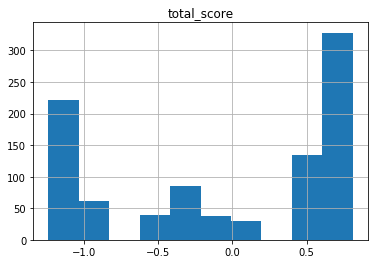

In [31]:
tdata_nba.hist(column="total_score")

In [36]:
nba.scores_dictionary_full.to_csv("nba_scores_dictionary.csv")

### Threshold data - GNB

In [19]:
%run models.py
gnb = NB()

In [20]:
gnb.train(queries_gnb, "obesity", 1, rdata)

In [21]:
gnb.predict(rdata)

In [22]:
tdata_gnb = gnb.predicted_scores.join(gnb.get_predicted_labels()).join(rdata["obesity"]).join(rdata["ejerHistory"], rsuffix='_original')

In [29]:
tdata_gnb[(tdata_gnb.obesity == 0) & (tdata_gnb.predicted_obesity == 1)]

,ejerHistory,total_score,predicted_obesity,obesity,ejerHistory_original
dp_folio,,,,,
2,0.398661,0.398661,1.0,0,BBAA
5,0.200506,0.200506,1.0,0,BBBB
6,0.535862,0.535862,1.0,0,ABBB
7,0.200506,0.200506,1.0,0,BBBB
11,0.200506,0.200506,1.0,0,BBBB
...,...,...,...,...,...
1073,0.398661,0.398661,1.0,0,BBAA
1075,0.398661,0.398661,1.0,0,BBAA
1078,0.212075,0.212075,1.0,0,BAAA


In [30]:
tdata_gnb.to_csv("score_breakdown_gnb")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8731ee0110>]],
      dtype=object)

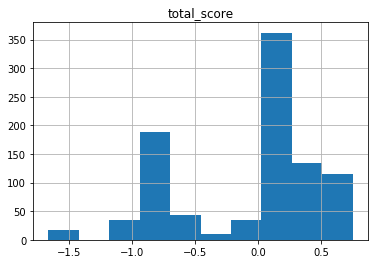

In [24]:
tdata_gnb.hist(column="total_score")

In [25]:
1 - np.sum(tdata_gnb["predicted_obesity"] - tdata_gnb["obesity"]) / tdata_gnb.shape[0]

0.5644302449414271

In [37]:
gnb.scores_dictionary_full.sort_values(["score"], ascending=False)

,feat,cat,class,classcat,score,nx,ncx,nc
14,ejerHistory,BBBA,obesity,1,0.748036,87,33,213
7,ejerHistory,ABBB,obesity,1,0.535862,28,9,213
9,ejerHistory,BAAB,obesity,1,0.418079,24,7,213
12,ejerHistory,BBAA,obesity,1,0.398661,110,33,213
10,ejerHistory,BABA,obesity,1,0.248180,9,2,213
8,ejerHistory,BAAA,obesity,1,0.212075,62,16,213
15,ejerHistory,BBBB,obesity,1,0.200506,241,63,213
11,ejerHistory,BABB,obesity,1,0.187555,21,5,213
4,ejerHistory,ABAA,obesity,1,0.172956,29,7,213
5,ejerHistory,ABAB,obesity,1,0.025036,11,2,213


In [38]:
gnb.scores_dictionary_full.to_csv("gnb_scores_dictionary.csv")